In [9]:
import torch.nn as nn
import torch
import torchvision
import numpy as np

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [11]:
from mmseg.models import SegmenterMaskTransformerHead
import mmcv

# so we will use mask transformer for decoder

In [12]:
import mmseg
from mmseg.models import SegmenterMaskTransformerHead
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [13]:
config_file = "/home/emir/Desktop/dev/myResearch/src/mmsegmentation/mmseg/.mim/configs/segmenter/segmenter_vit-l_mask_8x1_640x640_160k_ade20k.py"
cp_file = "/home/emir/Desktop/dev/myResearch/seg_model/cp_seg_16/segmenter_vit-l_mask_8x1_640x640_160k_ade20k_20220614_024513-4783a347.pth"

In [14]:
model = init_segmentor(config=config_file, device=device, checkpoint=cp_file)

load checkpoint from local path: /home/emir/Desktop/dev/myResearch/seg_model/cp_seg_16/segmenter_vit-l_mask_8x1_640x640_160k_ade20k_20220614_024513-4783a347.pth


In [15]:
from mmseg.datasets.ade import ADE20KDataset
imgs_dir = "/home/emir/Desktop/dev/myResearch/dataset/Ade20K/release_test/testing/"

In [16]:
import matplotlib.pyplot as plt

In [17]:
import os
def visualize_random_seg(model, imgs_dir):
    test_imgs = os.listdir(imgs_dir)
    rand_ind = np.random.randint(len(test_imgs))
    img_dir = test_imgs[rand_ind]
    results = inference_segmentor(model=model, imgs=imgs_dir+img_dir)
    fig = plt.figure(figsize=(15, 10))
    rows = 2
    columns = 2
    show_result_pyplot(model=model, img=imgs_dir+img_dir, result=results, palette=get_palette("ade20k"), title="Segmentation Pred")
    
    #print(results[0].shape)
    

<Figure size 1500x1000 with 0 Axes>

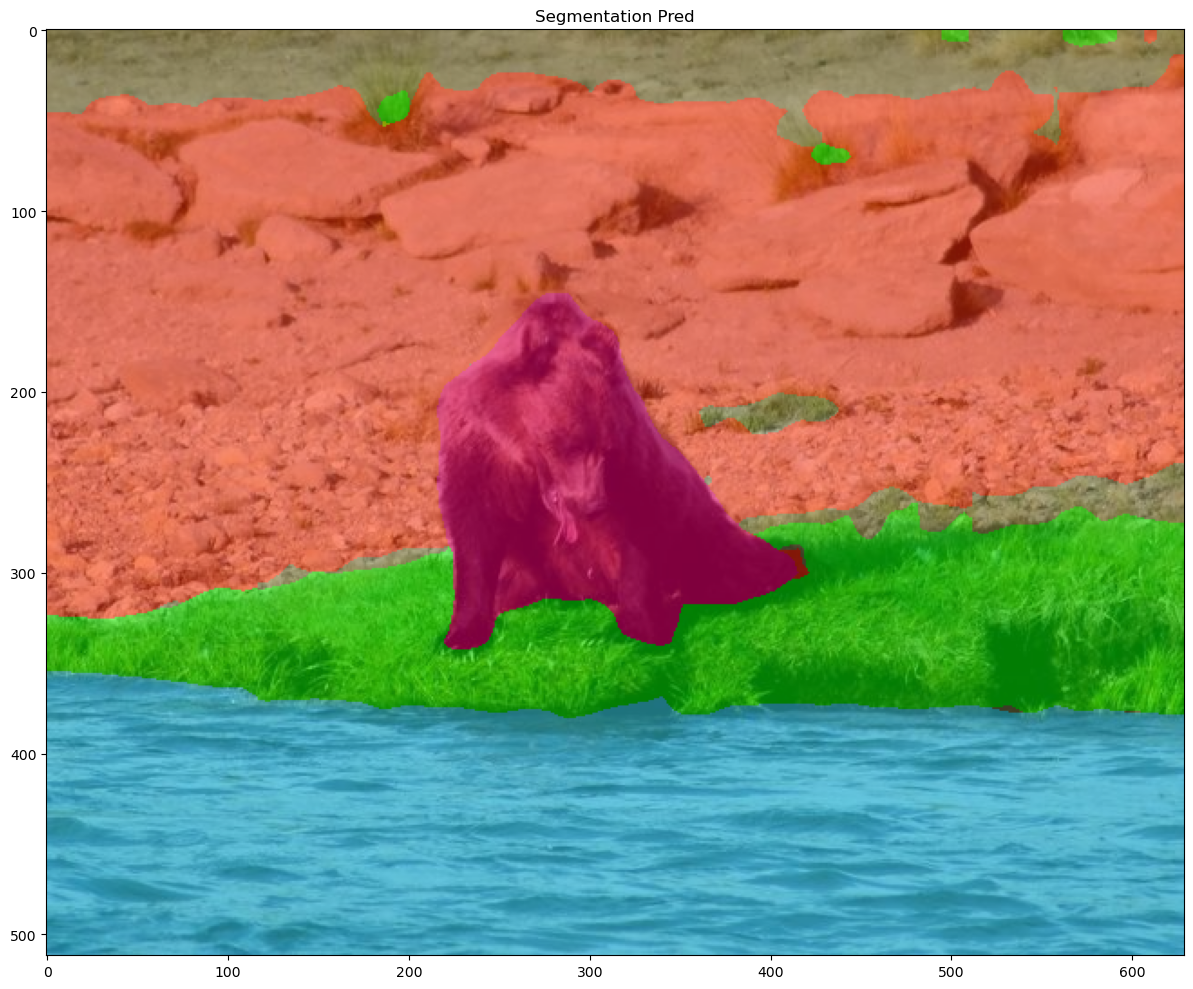

In [32]:
visualize_random_seg(model=model, imgs_dir=imgs_dir)